<a href="https://colab.research.google.com/github/Panditcodes/DLproject/blob/main/BreastCancerClassificationwithNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data collection and preprocessing

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#loading the data to a data frame
data_frame  = pd.DataFrame(breast_cancer_dataset.data,columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding target column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
#to check he number of rows and columns of the datset
data_frame.shape

(569, 31)

In [ ]:
#getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


0 values are missing that means all the values are present in the dataset

In [ ]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#checking the distribution of Target Variable
data_frame['label'].value_counts()

,count
label,
1,357
0,212


**1 --> benign**
**0 --> malignant**

In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [ ]:
X = data_frame.drop(columns = 'label',axis = 1)
Y = data_frame['label']

splitting the training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

Building the neural network

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
 import tensorflow as tf
 tf.random.set_seed(3)
 from tensorflow import keras

In [ ]:
 #setting up the layers of the neural network
 model = keras.Sequential([
    keras.Input(shape=(30,)),
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
#compiling the neural network
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_std, Y_train,validation_split = 0.1, epochs=75, batch_size=10)

Epoch 1/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.6463 - loss: 0.6868 - val_accuracy: 0.8696 - val_loss: 0.3558
Epoch 2/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2954 - val_accuracy: 0.9565 - val_loss: 0.2060
Epoch 3/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9303 - loss: 0.1878 - val_accuracy: 0.9565 - val_loss: 0.1463
Epoch 4/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9387 - loss: 0.1399 - val_accuracy: 0.9565 - val_loss: 0.1154
Epoch 5/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.1120 - val_accuracy: 0.9565 - val_loss: 0.0985
Epoch 6/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.0933 - val_accuracy: 0.9565 - val_loss: 0.0890
Epoch 7/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.0807 - val_accuracy: 0.9565 - val_loss: 0.0827
Epoch 8/75
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.0713 - val_accuracy: 0.9565 - val_loss

training accuracy is 95.65%

Visualizing accuracy and loss

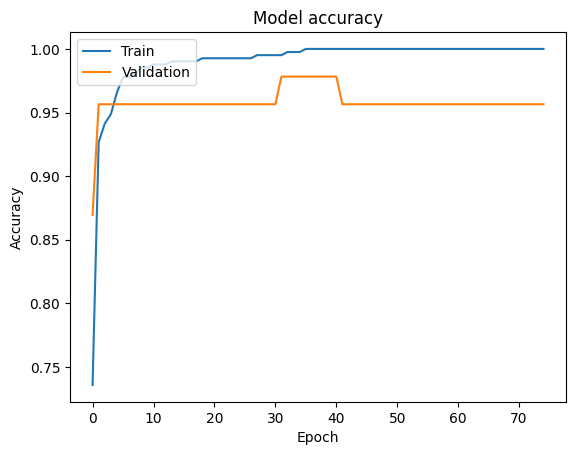

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


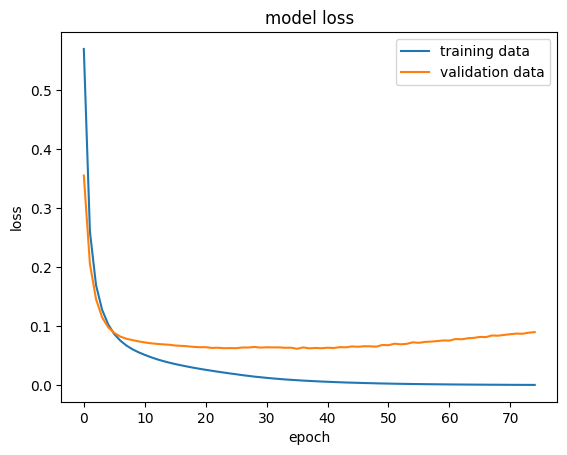

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_scaler, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9571 - loss: 0.2244
0.9473684430122375


Building a predictive system

In [ ]:
print(X_test_scaler.shape)
print(X_test_scaler[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
Y_pred = model.predict(X_test_scaler)
print(Y_pred.shape)
print(Y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
(114, 2)
[0.5538689 0.9522233]


This gives us the probability of the model giving 0 or 1

In [ ]:
print(X_test_scaler)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(Y_pred)

[[5.5386889e-01 9.5222330e-01]
 [3.3600783e-01 8.7207025e-01]
 [2.0901919e-03 9.9987805e-01]
 [1.0000000e+00 9.1596892e-17]
 [2.9839838e-01 9.3427658e-01]
 [1.0000000e+00 6.0793193e-09]
 [3.8057171e-02 9.9311405e-01]
 [1.2266700e-03 9.9994433e-01]
 [5.0275791e-03 9.9974412e-01]
 [6.1579836e-03 9.9981117e-01]
 [9.6121722e-01 1.2850500e-02]
 [4.3626726e-01 8.2820064e-01]
 [1.8180072e-01 9.0923148e-01]
 [2.3824894e-01 9.2914623e-01]
 [2.8937233e-03 9.9994159e-01]
 [9.9999869e-01 1.4935375e-05]
 [7.5002066e-03 9.9940622e-01]
 [7.1562821e-04 9.9996376e-01]
 [7.0721116e-03 9.9979103e-01]
 [1.0000000e+00 1.9950615e-07]
 [5.4479391e-05 1.0000000e+00]
 [2.1193670e-03 9.9984825e-01]
 [8.9415275e-03 9.9952990e-01]
 [4.2647874e-04 9.9998665e-01]
 [2.6526680e-02 9.9703479e-01]
 [1.0000000e+00 9.7755060e-07]
 [1.6585890e-02 9.9732602e-01]
 [6.4998955e-01 9.4599599e-01]
 [9.9999988e-01 2.7142587e-06]
 [1.0000000e+00 3.7336008e-07]
 [1.1769552e-01 9.9707460e-01]
 [4.2833122e-03 9.9987364e-01]
 [3.2514

we'll convert this probability to label

In [ ]:
Y_pred_label = [np.argmax(i) for i in Y_pred ]
print(Y_pred_label)

[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)

In [ ]:
user_input = input("Enter 30 feature values separated by commas: ")
input_data = [float(x) for x in user_input.split(",")]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)
print("Standardized Input:", std_data)

prediction = model.predict(std_data)
print("Raw Prediction:", prediction)

prediction_label = np.argmax(prediction, axis=1)
print("Predicted Label:", prediction_label)

if prediction_label[0] == 0:
    print("The Breast Cancer is Malignant")
else:
    print("The Breast Cancer is Benign")


Enter 30 feature values separated by commas:  20.57, 17.77,132.6,1326,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.998,0.876,0.08902


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standardized Input: [[ 1.84338767e+00 -3.65861548e-01  1.68455837e+00  1.90932862e+00
  -6.41304895e-01 -6.38465780e-01  1.22258147e+00  2.25192123e-01
   1.35980593e+01  9.76351948e+01  1.07427722e+01  1.34640414e+02
  -1.37442927e+00 -8.45842044e-01  3.84745309e+00 -6.72958159e-01
  -6.52596377e-01 -1.38269509e+00  3.11575863e+03  9.74089330e+03
   3.00830724e+01  3.10479524e+02 -3.23374870e+00 -1.56570664e+00
   4.72670908e+00 -4.30475699e-01  2.78490151e-02  1.35120618e+01
   9.80602016e+00  2.86527748e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Raw Prediction: [[0. 1.]]
Predicted Label: [1]
The Breast Cancer is Benign
